# Project description
Urban mobility significantly contributes to global environmental impact. With the growth in urbanareas worldwide, cities are implementing policies to focus on sustainable urban and mobility devel-opment. Urban areas exhibit high variability in structure, economic output, mobility behaviour,among others. Pinpointing to the exact causes of emissions is impossible. However, understandingthe relationship of mobility with infrastructure resources and other urban indicators may help gov-ernments predict long-term mobility behaviour and intervene with future pathways into sustainablemobility options. </br>

Project goals: You are tasked to identify how mobility is related to the infrastructural form of acity and across multiple cities. Use your findings toward helping governments transform mobilitywithin cities for reducing environmental impacts of mobility use.
Data: </br>
1. Local city-wide indicators of urban mobility: Multi-city Traffic Datasetprovided publicly byThe Institute for Transport Planning and Systems at ETH Zurich.
2. Global city-wide indicators of urban mobility and environmental impacts:Urban TypologiesProject[Reference]3.Get indicators for infrastructure resources from OSMNX (street networks) and PYROSM(amenities and points of interest) python packages.High-level project goals1.Explore, Investigate, and Visualize various factors of the mobility data across cities of interest.2.Describe and incorporate additional data sources that you will use to help you understandrelationships between mobility and the built environment.
3. Identify correlations between mobility and the built environment.4.Perform clustering or LISA analysis on city streets where congestion may be related stronglywith the presence of certain amenities. Think about how that may vary with distance toamenities.
4. Or, train and evaluate models using the mobility data (either as predictors or as the primaryresponse in some fashion) and your data sources.
6. Use and interpret your models to discuss the causes and correlations of or effects due todifferences in congestion across cities or within a city of your choice.
7. Aggregate city-wide findings to correlate with environmental indicators used in data set (2) -urban typology - to comment on policy initiatives of the governments. (Think how you mayaggregate city-wide findings to a single score for the whole city to compare with indicatorsused in data set 

(2))Note: Not all data may be available for all cities. Hence, conduct this analysis for at least5citiesoverlapping between sets1and2in the data. You are welcome to do the analysis in many morecities.

# blabla

In [10]:
# 
import pandas as pd
import geopandas as gpd
from pyrosm import OSM
from pyrosm import get_data
from shapely.geometry import Polygon


In [2]:
UTD19 = pd.read_csv('Data/detectors_public.csv')
UTD19.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat
0,U1-52G,0.196037,0.005512,secondary,Gögginger Straße,50,augsburg,1.0,72.0,10.889553,48.359957
1,U1-51G,0.130039,0.004013,secondary,Gögginger Straße,50,augsburg,1.0,73.0,10.889601,48.359945
2,U1-52L,0.155863,0.022228,secondary,Gögginger Straße,50,augsburg,1.0,70.0,10.889355,48.359876
3,U1-51L,0.197675,0.021889,secondary,Gögginger Straße,50,augsburg,1.0,71.0,10.889396,48.359862
4,U1-62,0.065183,0.024465,secondary,Rosenaustraße,50,augsburg,1.0,68.0,10.889361,48.360578


In [58]:
len(UTD19.citycode.unique())

40

In [4]:
# munich, rotterdam, frankfurt, hamburg, zurich
citylist = ['Munich', 'Rotterdam-Hague', 'Frankfurt', 'Hamburg', 'Zurich']

In [5]:
UrbanTypo = pd.read_excel('Data/FINAL-COMBINED-DATASET.xlsx')


In [6]:
Cities = UrbanTypo.loc[(UrbanTypo.City.isin(citylist))]
Cities

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
98,Hamburg,99,9,MassTransit Heavyweight,Germany,42.00,18.00,12,28.00,1.68,...,0.016812,0.667477,0.273596,0.437481,0.747204,0.536597,0.035424,0.357805,0.313441,0.231415
99,Munich,100,9,MassTransit Heavyweight,Germany,37.00,21.00,14,28.00,1.73,...,0.021030,0.674947,0.142531,0.433690,0.779353,0.599366,0.033533,0.354032,0.236366,0.429755
101,Frankfurt,102,10,MassTransit Moderate,Germany,38.00,20.00,11,31.00,1.68,...,0.033763,0.080828,0.131759,0.403807,0.741574,0.625617,0.044672,0.323014,0.323657,0.342305
182,Rotterdam-Hague,183,10,MassTransit Moderate,Netherlands,49.00,17.00,16,18.00,1.96,...,NaN,0.356458,0.164029,0.484939,0.750362,0.540186,0.035450,0.204339,0.193488,0.508605
238,Zurich,239,10,MassTransit Moderate,Switzerland,42.92,46.31,4.14,5.65,1.68,...,0.025206,0.090735,0.346604,0.163072,1.000000,0.575431,0.025346,0.388853,0.185876,0.453369


In [49]:
# find a way to get info for specific tag and specific subtype
# 
# Get data
# loop van maken
fp ="C:/Users/hanna/Documents/EPA/Urban Data Science/Final assignment/data/cropped.osm.pbf"

In [52]:
# Get the shapely geometry from GeoDataFrame
#bbox_geom = [4.420, 51.868, 4.561, 51.942]

# Initiliaze with bounding box
osm = OSM(filepath=fp)
#osm = OSM(fp)

# Read POIs with custom filter 
my_filter={"amenity": True}
pois = osm.get_pois(custom_filter=my_filter)

# Merge poi type information into a single column
pois["shop"] = pois["shop"].fillna(' ')
pois["amenity"] = pois["amenity"].fillna(' ')
pois["building"] = pois["building"].fillna(' ')
pois["poi_type"] = pois["amenity"] + pois["shop"] + pois["building"]

# Plot
ax = pois.plot(column="poi_type", legend=True, markersize=4, figsize=(14,8), legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))

C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None,


KeyError: 'shop'

In [ ]:
pois.tail()

In [ ]:
osm.head()

In [ ]:
bbox_geom.plot()

In [41]:
osm1 = OSM(fp)
a = osm1.get_buildings()

C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\buildings.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None


In [35]:
import pytest
def test_pbf():
    pbf_path = get_data("test_pbf")
    return pbf_path
test_pbf=test_pbf()
test_pbf

'C:\\Users\\hanna\\Anaconda3\\envs\\gds\\lib\\site-packages\\pyrosm\\data\\test.osm.pbf'

In [28]:
from pyrosm import OSM
from geopandas import GeoDataFrame
from shapely.geometry import Polygon

bounds = [26.94, 60.525, 26.96, 60.535]
# Init with bounding box
osm = OSM(filepath=test_pbf, bounding_box=bounds)
gdf = osm.get_buildings()

assert isinstance(gdf.loc[0, 'geometry'], Polygon)
assert isinstance(gdf, GeoDataFrame)

# Test shape
assert gdf.shape == (569, 15)

required_cols = ['building', 'addr:street',
                 'addr:postcode', 'addr:housenumber',
                 'opening_hours', 'id',
                 'timestamp', 'version', 'geometry', 'tags']

for col in required_cols:
    assert col in gdf.columns

# The total bounds of the result should not be larger than the filter
# (allow some rounding error)
result_bounds = gdf.total_bounds
for coord1, coord2 in zip(bounds, result_bounds):
    assert round(coord2, 3) >= round(coord1, 3)



C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\buildings.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None


C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\buildings.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None


AttributeError: 'OSM' object has no attribute 'head'

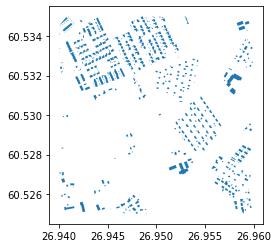

In [36]:
bounds = [26.94, 60.525, 26.96, 60.535]
# Init with bounding box
osm = OSM(filepath=test_pbf, bounding_box=bounds)
gdf = osm.get_buildings()
gdf.plot()
osm.head()

C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\buildings.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None


<AxesSubplot:>

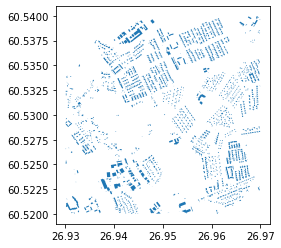

In [34]:
bounds = [26.94, 60.525, 26.96, 60.535]
# Init with bounding box
osm = OSM(filepath=test_pbf)
gdf = osm.get_buildings()
gdf.plot()

In [53]:
citylist = ['Munich', 'Rotterdam-Hague', 'Frankfurt', 'Hamburg', 'Zurich']

maxlonglt = UTD19Cities.loc[UTD19Cities.citycode == 'rotterdam', ['long', 'lat']].max() # maxlonglat[0] = long, 1 lat
minlonglt = UTD19Cities.loc[UTD19Cities.citycode == 'rotterdam', ['long', 'lat']].min() #
north = maxlonglt[1] 
south = minlonglt[1]
east = maxlonglt[0]
west = minlonglt[0]

NameError: name 'UTD19Cities' is not defined